# Introduction to physics of complex systems

## Problem Sheet 01

Name: Corinna Elena Wegner

##  Problem 1: Fixed points and stability 
Analyze the following systems graphically. In each case, draw the graphs and indicate the direction of the flow on the real line. Use this to find all the fixed points and classify their stability. (Hint: When $\frac{dx}{dt}=f(x)-g(x)$, sketch the graphs of $f(x)$ and $g(x)$ on the same axes, and look for intersections. You can also use this to decide when the right-hand side is positive or negative and consequently determine the stability properties of the fixed points.)

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def f_1(x):
    return x - x**2

def f_2(x):
    return x-np.cos(x)

def f_3(x):
    return 1-2*np.cos(x)

def plot_function(f, xmin, xmax, rate_arrows):
    x = np.linspace(xmin,xmax,(xmax-xmin)*100)
    list_f = [f(i) for i in x]
    plt.plot(x, list_f)
    intersections = np.argwhere(np.diff(np.sign(list_f))).flatten()
    intersections.append(0)
    intersections.append((xmax-xmin)*100)
    set(intersections)
    intersections.sort()
    print(intersections)
    for i in range(len(intersections)-1):
        x_in = x[intersections[i]:intersections[i+1]][::rate_arrows]
        if list_f[intersections[i]+1] > 0:
            plt.plot(x_in,np.zeros(len(x_in)), marker = ">")
        else:
            plt.plot(x_in, np.zeros(len(x_in)), marker = "<")
    plt.xlabel("x")
    plt.ylabel("dx/dt")
    plt.title(f"{intersections}")
    plt.grid()

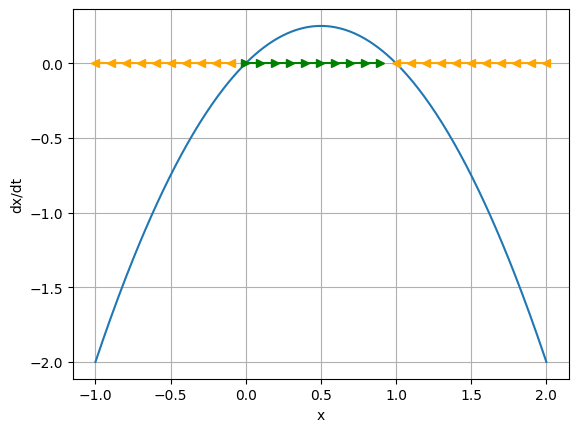

In [51]:
plot_function(f_1, 0, 2, 10)

$\frac{dx}{dt}=x-x^2$: Two 

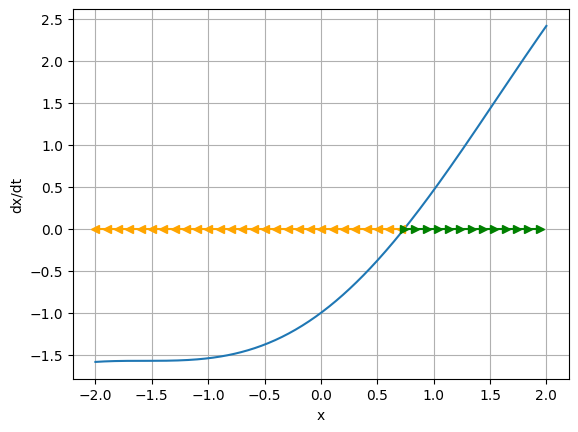

In [54]:
plot_function(f_2, 0, 10, 100)

[0, 173, 200]


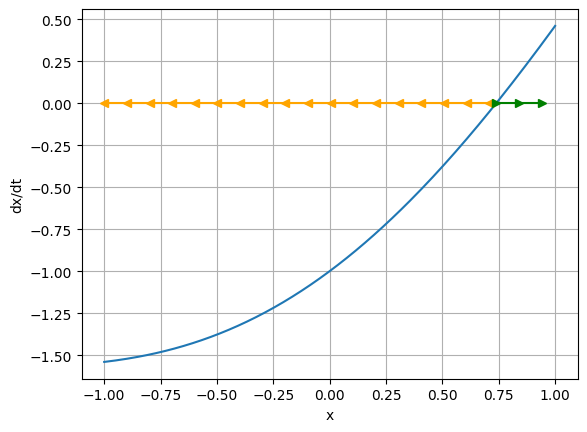

In [46]:
plot_function(f_3, -10,10,100)

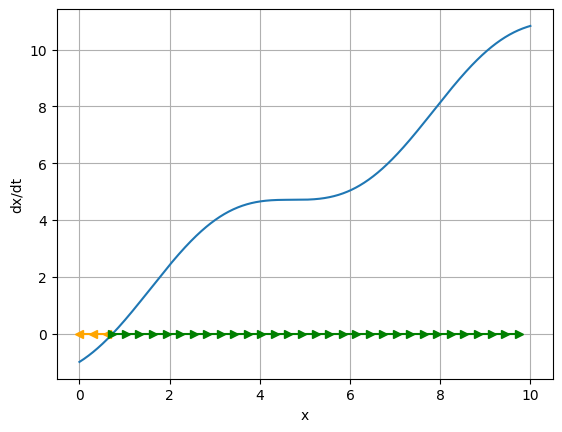

In [57]:
print("blarblablr")

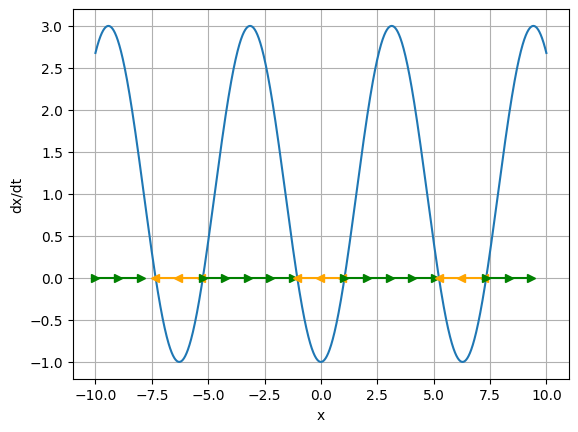